# ニューラルネットワーク

ニューラルネットワークを図で表すと、左の列を入力層、中間の列を中間層（隠れ層）、一番右の層を出力層と呼ぶ。


h(x)={0(x=<0),1(x>0)} バイアスは此のように式で表せる

このような入力信号の総和を出力信号に変換する関数を活性化関数と呼ぶ。

またニューラルネットワークではシグモイド関数がよく用いられる。
h(x)=1/1+exp(-x)

ステップ関数をグラフで表してみる

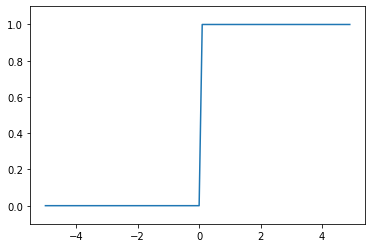

In [11]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x>0,dtype=int) 

x=np.arange(-5.0,5.0,0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1) #y軸の範囲を指定
plt.show()

次にシグモイド関数を実装してみる

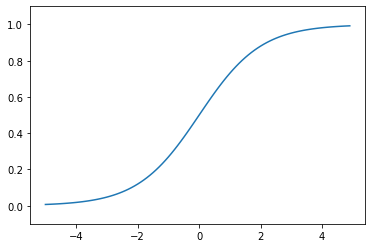

In [27]:
def sigmoid(x):
    return 1 / (1+np.exp(-x)) 

x=np.arange(-5.0,5.0,0.1)
y=sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1) #y軸の範囲を指定
plt.show()

２つを見比べてみると入力に対して連続的に出力が変化するかなどの差があるが、大きな視点で見ると同じような形をしていることがわかる。
両者はともに非線形関数である。

つぎに最近用いられているReLU関数を用いてみる

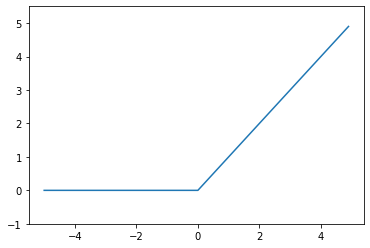

In [32]:
def relu(x):
    return np.maximum(0,x)

x=np.arange(-5.0,5.0,0.1)
y=relu(x)
plt.plot(x,y)
plt.ylim(-1.0,5.5) #y軸の範囲を指定
plt.show()

入力が０を超えていればその入力をそのまま出力し、０以下ならば０を出力する関数であることがわかる

次に多次元配列の計算を行う　前に解いた行列のプリントを思い出す　
まずは一次元から

In [37]:
import numpy as np
A=np.array([1,2,3,4])
print(A)
[1,2,3,4]
np.ndim(A)
1
A.shape
(4,)
A.shape[0]
4

[1 2 3 4]


4

続いて二次元

In [41]:
B=np.array([[1,2],[3,4],[5,6]])
print(B)
#エラー吐くので省く
np.ndim(B)
2
B.shape
(3,2)

[[1 2]
 [3 4]
 [5 6]]


(3, 2)

行列の積の計算

In [43]:
A=np.array([[1,2],[3,4],[5,6]])
A.shape
B=np.array([7,8])
B.shape
np.dot(A,B)

array([23, 53, 83])

ニューラルネットワークの行列の積

In [49]:
X=np.array([1,2])
W=np.array([[1,3,5],[2,4,6]])
Y=np.dot(X,W)
print(Y)

[ 5 11 17]


３層ニューラルネットワークの実装

In [52]:
x=np.array([1.0,0.5])
w1=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
b1=np.array([0.1,0.2,0.3])

a1=np.dot(x,w1)+b1

z1=sigmoid(a1)

print(a1)
print(z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [56]:
w2=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
b2=np.array([0.1,0.2])

a2=np.dot(z1,w2)+b2
z2=sigmoid(a2)
print(z2)

[0.62624937 0.7710107 ]


最後の層では活性化関数だけがこれまでの隠れそうと異なる

In [58]:
def identity_function(x):
    return x

w3=np.array([[0.1,0.3],[0.2,0.4]])
b3=np.array([0.1,0.2])

a3=np.dot(z2,w3)+b3
y=identity_function(a3)
print(y)

[0.31682708 0.69627909]


ここまで行った実装をまとめて書いてみるとこうなる

In [60]:
def init_network(): 
    network={}
    network['w1']=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1']=np.array([0.1,0.2,0.3])
    network['w2']=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2']=np.array([0.1,0.2])
    network['w3']=np.array([[0.1,0.3],[0.2,0.4]])
    network['b3']=np.array([0.1,0.2])
    
    return network

def forward(network,X): 
    w1,w2,w3=network['w1'],network['w2'],network['w3']
    b1,b2,b3=network['b1'],network['b2'],network['b3']
    
    a1=np.dot(x,w1)+b1
    z1=sigmoid(a1)
    a2=np.dot(z1,w2)+b2
    z2=sigmoid(a2)
    a3=np.dot(z2,w3)+b3
    y=identity_function(a3)
    
    return y

network=init_network()
x=np.array([1.0,0.5])
y=forward(network,x)
print(y)

[0.31682708 0.69627909]


# 手書き数字識別

ここまでニューラルネットワークの仕組みをまなんだところで、実践的な問題に取り組んでみる。


In [76]:
import sys, os
sys.path.append(os.pardir) #親ディレクトリのファイルをインポートするための設定
from dataset.mnist import load_mnist
(x_train,t_train),(x_test,t_test)=\
    load_mnist(flatten=True,normalize=False)

ModuleNotFoundError: No module named 'dataset'